<a href="https://colab.research.google.com/github/hayari/GoMyCodeML/blob/master/Let_s_apply_some_data_visualization_knowledge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=http://www.humour-blague.fr/blagues/titanic.jpg width="200" height="400">

#Titanic Surviving Data Set

#Data Loading

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from difflib import SequenceMatcher
import re

**Task: After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values**

In [37]:
titanic=pd.read_csv('train_titanic.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Preparation

## Cleansing Null Values

In [39]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
titanic.isnull().sum().sum()

866

### Cabin

<img src=http://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png width="200" height="400">

Assuming that passengers without Cabin number are embarked on the deck (First Class / Second Class / Third Class)

In [41]:
titanic["Cabin"].fillna("Deck",inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

### Age

We will try to correct Age data using other sources on the Internet https://www.encyclopedia-titanica.org otherwise we will use mean() function to replace NaN values

In [42]:
dfency = pd.read_html('https://www.encyclopedia-titanica.org/titanic-passenger-list/')
dfage=dfency[0][["Name","Age","Class/Dept"]]
dfage.head(10)

,Name,Age,Class/Dept
0,"ALLEN, Miss Elisabeth Walton",29,1st Class Passenger
1,"ALLISON, Mrs Bess Waldo",25,1st Class Passenger
2,"ALLISON, Master Hudson Trevor",11m,1st Class Passenger
3,"ALLISON, Miss Helen Loraine",2,1st Class Passenger
4,"ALLISON, Mr Hudson Joshua Creighton",30,1st Class Passenger
5,"ANDERSON, Mr Henry",42,1st Class Passenger
6,"ANDREWS, Miss Cornelia Theodosia",62,1st Class Passenger
7,"ANDREWS, Mr Thomas",39,1st Class Passenger H&W Guarantee Group
8,"APPLETON, Mrs Charlotte",53,1st Class Passenger
9,"ARTAGAVEYTIA, Mr Ramon",71,1st Class Passenger


In [0]:
def get_similar(row,lookup,threshold):
    if row.isnull()["Age"]:
        name=row["Name"]
        sim=lookup["Name"].apply(lambda x :SequenceMatcher(None, x, name).ratio())
        if len(sim.index[sim>threshold].tolist())>0 :
            idx=sim.index[sim>threshold].tolist()[0]
            try: 
                val=float(lookup.iloc[idx,1])
                return val
            except:
                return np.nan
        else:
            return np.nan
    else:
        return row["Age"]

In [0]:
titanic["cAge"]=titanic.apply(lambda row: get_similar(row,dfage,0.50), axis=1)


In [45]:
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
cAge            16
dtype: int64

**Fill uncomplete Age with mean value**

In [46]:
titanic["cAge"].fillna(value=titanic["cAge"].mean(),inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
cAge             0
dtype: int64

Fill uncomplete embarked with U (Unknown)

In [47]:
titanic["Embarked"].fillna(value='U',inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
cAge             0
dtype: int64

## Dealing with Categorical Data

In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
cAge           891 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [49]:
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

In [50]:

sex_dict={"Sex":{'male': 1, 'female': 2}}
embarked_dict={"Embarked":{"U":0,"C":1,"Q":2,"S":3}}

newtitanic=titanic.drop(["Age"],axis=1)
newtitanic=newtitanic.replace(sex_dict,inplace=False)
newtitanic.replace(embarked_dict,inplace=True)
encoder=LabelEncoder()
newtitanic["Cabin"]=encoder.fit_transform(newtitanic["Cabin"])
newtitanic["Ticket"]=encoder.fit_transform(newtitanic["Ticket"])
newtitanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cAge
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,523,7.2500,115,3,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,596,71.2833,81,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",2,0,0,669,7.9250,115,3,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,49,53.1000,55,3,35.0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,472,8.0500,115,3,35.0


In [51]:
newtitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null int64
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
cAge           891 non-null float64
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


# Data visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

## Studying Numerical Variables
### Age Distribution
most passengers are aged between 20 years and 38 years
there are some childs (< 5 years)

we've got an outliers: for example **Barkworth, Mr. Algernon Henry Wilson**. acording to https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html he was aged 47 years when he boared the Titanic and this seem statistically correct (represented as outlier) 

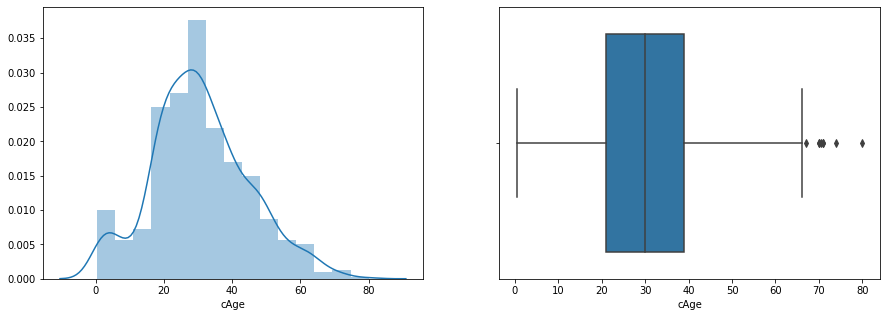

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data=newtitanic["cAge"][newtitanic["cAge"]>=0]
sns.distplot(data,bins=15,hist=True)
plt.subplot(1,2,2)
sns.boxplot(data)

In [54]:
data.describe()

count    891.000000
mean      30.728194
std       14.288099
min        0.420000
25%       21.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: cAge, dtype: float64

**Outliers**

In [55]:
newtitanic[newtitanic["cAge"]>70]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cAge
96,97,0,1,"Goldschmidt, Mr. George B",1,0,0,607,34.6542,12,1,71.0
116,117,0,3,"Connors, Mr. Patrick",1,0,0,460,7.7500,115,2,70.5
493,494,0,1,"Artagaveytia, Mr. Ramon",1,0,0,603,49.5042,115,1,71.0
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,0,0,218,30.0000,5,3,80.0
851,852,0,3,"Svensson, Mr. Johan",1,0,0,317,7.7750,115,3,74.0


### SibSp (sibling number) Distribution
- most passengers are alone (without siblings)

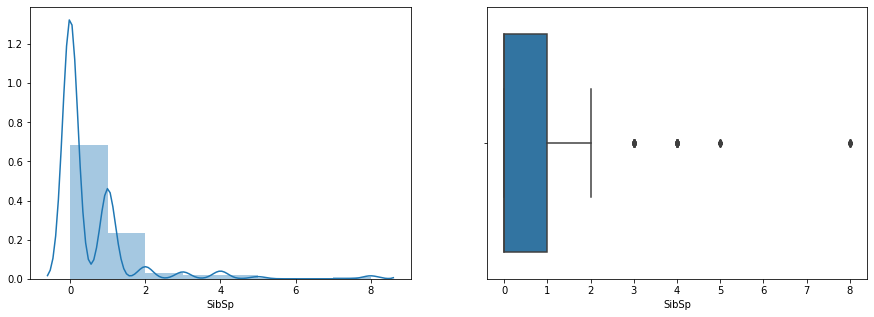

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(newtitanic["SibSp"],bins=8,hist=True)
plt.subplot(1,2,2)
sns.boxplot(newtitanic["SibSp"])

In [57]:

data=newtitanic[["PassengerId","SibSp"]].groupby(["SibSp"]).count().reset_index()
data.columns=["Nb Siblings","Nb.Passengers"]
data.set_index("Nb Siblings")

,Nb.Passengers
Nb Siblings,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


**The Sage and Goodwin Familly Tragedy**

In [58]:
newtitanic[titanic["SibSp"]==8]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cAge
159,160,0,3,"Sage, Master. Thomas Henry",1,8,2,568,69.55,115,3,39.0
180,181,0,3,"Sage, Miss. Constance Gladys",2,8,2,568,69.55,115,3,62.0
201,202,0,3,"Sage, Mr. Frederick",1,8,2,568,69.55,115,3,43.0
324,325,0,3,"Sage, Mr. George John Jr",1,8,2,568,69.55,115,3,37.0
792,793,0,3,"Sage, Miss. Stella Anna",2,8,2,568,69.55,115,3,39.0
846,847,0,3,"Sage, Mr. Douglas Bullen",1,8,2,568,69.55,115,3,49.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",2,8,2,568,69.55,115,3,36.0


In [59]:
newtitanic[titanic["SibSp"]==5]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cAge
59,60,0,3,"Goodwin, Master. William Frederick",1,5,2,566,46.9,115,3,11.0
71,72,0,3,"Goodwin, Miss. Lillian Amy",2,5,2,566,46.9,115,3,16.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",1,5,2,566,46.9,115,3,1.0
480,481,0,3,"Goodwin, Master. Harold Victor",1,5,2,566,46.9,115,3,9.0
683,684,0,3,"Goodwin, Mr. Charles Edward",1,5,2,566,46.9,115,3,14.0


## Studying Categorical Variables
### Survived Distribution
- The majority of the passengers died in the tragedy

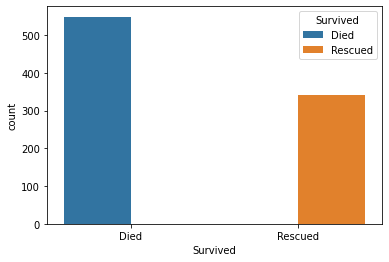

In [60]:
sns.countplot(x="Survived",data=newtitanic.replace({"Survived":{0:"Died",1:"Rescued"}}), hue="Survived")

In [61]:
data=newtitanic[["PassengerId","Survived"]].groupby("Survived").count().reset_index().replace({"Survived":{0:"Died",1:"Rescued"}}).set_index("Survived")
data.columns=['Nb. Passengers']
data

,Nb. Passengers
Survived,
Died,549
Rescued,342


### Pclass distribution
- most of the dead are third class pasengers 

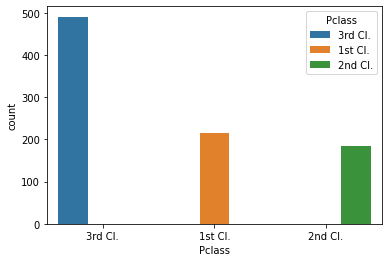

In [62]:
data=newtitanic.replace({"Pclass":{1:"1st Cl.",2:"2nd Cl.",3:"3rd Cl."}})

sns.countplot(x="Pclass",data=data, hue="Pclass")

In [63]:
data=newtitanic[["PassengerId","Pclass"]].groupby("Pclass").count().reset_index().replace({"Pclass":{1:"1st Cl.",2:"2nd Cl.",3:"3rd Cl."}}).set_index("Pclass")
data.columns=['Nb. Passengers']
data

,Nb. Passengers
Pclass,
1st Cl.,216
2nd Cl.,184
3rd Cl.,491


In [64]:
newtitanic[["Survived","Pclass"]].groupby("Pclass").sum().reset_index().replace({"Pclass":{1:"1st Cl.",2:"2nd Cl.",3:"3rd Cl."}}).set_index("Pclass")

,Survived
Pclass,
1st Cl.,136
2nd Cl.,87
3rd Cl.,119


In [67]:
pclass_dict={"Pclass":{1:"1st Cl.",2:"2nd Cl.",3:"3rd Cl."}}
dead=newtitanic[["Survived","Pclass"]].replace({"Survived":{1:'y',0:'n'}}).replace({"Survived":{'y':0,'n':1}}).groupby("Pclass").sum().reset_index().replace(pclass_dict).set_index("Pclass")
dead.columns=["Died"]
dead

,Died
Pclass,
1st Cl.,80
2nd Cl.,97
3rd Cl.,372


### Sex Distribution
- there are more men than women on the titanic
- there are more dead men than dead women (may be there are many gentelmens)


In [0]:
data=newtitanic[["PassengerId","Sex"]].groupby("Sex").count().reset_index().replace({"Sex":{1:"Men",2:"Women"}}).set_index("Sex")
data.columns=['Nb. Passengers']
data

In [0]:
dead=newtitanic[["Survived","Sex"]].replace({"Survived":{1:0,0:1}}).groupby("Sex").sum().reset_index().replace({"Sex":{1:"Men",2:"Women"}}).set_index("Sex")
dead.columns=["Died"]
dead

### Embarked distribution
- most the passengers are from Southampton
- Southampton has the most proportion of deads

In [0]:
embarked_dict={"Embarked":{0:"Unknown",1:'Cherbourg',2:"Queenstown",3:"Southampton"}}
sex_dict={"Sex":{1:"Men",2:"Women"}}
survived_dict={"Survived":{1:'survived',0:'dead'}}

In [0]:
data=newtitanic[["PassengerId","Embarked"]].groupby(["Embarked"]).count().reset_index().replace(embarked_dict).set_index("Embarked")
data.columns=['Nb. Passengers']
data

In [0]:
deadembarked=newtitanic[["PassengerId","Embarked","Survived"]].groupby(["Embarked","Survived"]).count().reset_index().replace(embarked_dict).replace(survived_dict).set_index("Embarked")
deadembarked=deadembarked.reset_index()
deadembarked=deadembarked.set_index(["Embarked","Survived"])
deadembarked.unstack()

In [0]:
deadembarked.unstack().plot(kind='bar',stacked=True)

In [0]:
ports=['Cherbourg',"Queenstown","Southampton"]
deadembarked["Percentage"]=100

for emb in ports:
    s=deadembarked.loc[(emb,"survived"),"PassengerId"]
    d=deadembarked.loc[(emb,"dead"),"PassengerId"]
    
    deadembarked.loc[(emb,"survived"),"Percentage"]=(s/(s+d))*100
    deadembarked.loc[(emb,"dead"),"Percentage"]=(d/(s+d))*100
   
deadembarked

### miscellaneous
- most deads from all regions are mens
- most the deads are from 3rd class and are specially from Southampton

In [0]:
dead=newtitanic[["PassengerId","Embarked","Pclass","Survived"]].groupby(["Embarked","Pclass","Survived"]).count().reset_index().replace(embarked_dict).replace(survived_dict).replace(sex_dict).set_index("Embarked")
dead=dead.reset_index()
dead=dead.set_index(["Embarked","Pclass","Survived"])
dead.unstack()
dead.unstack().plot(kind='bar',stacked=True)

In [0]:
dead=newtitanic[["PassengerId","Pclass","Survived"]].groupby(["Pclass","Survived"]).count().reset_index().replace(embarked_dict).replace(survived_dict).replace(pclass_dict).set_index("Pclass")
dead=dead.reset_index()
dead=dead.set_index(["Pclass","Survived"])
dead.unstack()
dead.unstack().plot(kind='bar',stacked=True)

In [0]:
dead=newtitanic[["PassengerId","Embarked","Pclass","Survived"]].groupby(["Embarked","Pclass","Survived"]).count().reset_index().replace(embarked_dict).replace(survived_dict).replace(pclass_dict).set_index("Embarked")
dead=dead.reset_index()
dead=dead.set_index(["Embarked","Pclass","Survived"])
dead.unstack()
dead.unstack().plot(kind='bar',stacked=True)

# Correlation
## Sex vs Age
- There is an apparent positif correlation between Sex and Survived (0.538826) => Sex is a determining factor in the survival of passengers on the Titanic
- No correlation between Age and Survived (-0.077221)

In [0]:
data=newtitanic[newtitanic["cAge"]>=0].replace(sex_dict)
g=sns.FacetGrid(data,col="Sex")
g.map(plt.hist,"cAge")

In [0]:
data=newtitanic[newtitanic["cAge"]>=0]
data[["cAge","Sex","Survived"]].corr()

In [0]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

In [0]:
data[["Age","Sex","Survived"]].groupby("Sex").sum()

#plot_correlation_map(data[["Age","Sex","Survived"]].set_index(["Age","Sex"]))


In [0]:
plot_correlation_map(data[["Age","Sex","Survived"]])